# Speech2Text examples

## Using SpeechRecognition library (https://github.com/Uberi/speech_recognition)

### setup:
* conda create --name `<your env name>` python=3.6
* source activate `<your env name>`
* conda install nb_conda
* pip install SpeechRecognition
* pip install pyaudio
    * If not working, brew install portaudio and again pip install pyaudio


In [1]:
import speech_recognition as sr

In [2]:
r = sr.Recognizer()

In [8]:
with sr.Microphone() as source:
    print("say something")
    audio = r.listen(source)
    print(type(audio))
    print("time over")
    print("recognition...")
    
try:
    print("text : " + r.recognize_google(audio))
except:
    print("didn't work")
    pass

say something
<class 'speech_recognition.AudioData'>
time over
recognition...
didn't work


In [3]:
import io

In [4]:
import wave

In [5]:
def get_wav_data_fromRAW(raw_data, convert_rate=None, convert_width=None):
    """
    Returns a byte string representing the contents of a WAV file containing the audio represented by the ``AudioData`` instance.

    If ``convert_width`` is specified and the audio samples are not ``convert_width`` bytes each, the resulting audio is converted to match.

    If ``convert_rate`` is specified and the audio sample rate is not ``convert_rate`` Hz, the resulting audio is resampled to match.

    Writing these bytes directly to a file results in a valid `WAV file <https://en.wikipedia.org/wiki/WAV>`__.
    """
    sample_rate = 44100
    sample_width = 2

    # generate the WAV file contents
    with io.BytesIO() as wav_file:
        wav_writer = wave.open(wav_file, "wb")
        try:  # note that we can't use context manager, since that was only added in Python 3.4
            wav_writer.setframerate(sample_rate)
            wav_writer.setsampwidth(sample_width)
            wav_writer.setnchannels(1)
            wav_writer.writeframes(raw_data)
            wav_data = wav_file.getvalue()
        finally:  # make sure resources are cleaned up
            wav_writer.close()
    return wav_data

In [24]:
#audio_raw = audio.get_raw_data()

In [22]:
#audio.sample_rate

44100

In [30]:
with open("microphone-results_fromRaw.wav", "wb") as f:
    f.write(get_wav_data_fromRAW(audio_raw))

In [6]:
from IPython.display import Audio
sound_file_end = './end_record.mp3'
sound_file_start = './start_record.mp3'
sound_file_howmany = './howmany.mp3'

In [13]:
#keywords = [("meeting over", 1), ("meeting start", 1)]

In [7]:
n=0
stop = True
l = []
start = False
while(stop):
    n = n+1
    with sr.Microphone() as source:
        r.adjust_for_ambient_noise(source)
        print("say something")
        audio1 = r.listen(source)
        print("time over")
        print("recognition...")

    try:
        #speech_as_text = r.recognize_sphinx(audio1, keyword_entries=keywords)
        speech_as_text = r.recognize_google(audio1)
        print("text : " + speech_as_text)
        if "meeting is over" in speech_as_text:
            stop = False
            Audio(sound_file_end, autoplay=True)
        elif "start the meeting" in speech_as_text:
            start = True
            print("OK let's start recording")
            Audio(sound_file_start, autoplay=True)
    except:
        print("didn't work")
        pass
            
    if start:
        l.append(audio1.get_raw_data())

# Let AIME ask for how many participants
Audio(sound_file_howmany, autoplay=True)

#speech to text
#text to number



say something
time over
recognition...
text : start the meeting
OK let's start recording
say something
time over
recognition...
text : 150w power video
say something
time over
recognition...
text : make money out of knowledge
say something
time over
recognition...
didn't work
say something
time over
recognition...
text : musical numbers for a project
say something
time over
recognition...
text : settings dropping
say something
time over
recognition...
text : drop the mic
say something
time over
recognition...
didn't work
say something
time over
recognition...
text : meeting is over


In [32]:
len(l)

3

In [33]:
binall = b''
for elem in l:
    binall += elem

In [34]:
with open("microphone-results_fromRaw.wav", "wb+") as f:
    f.write(get_wav_data_fromRAW(binall))

In [35]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

In [36]:
from pyAudioAnalysis import audioSegmentation as aS

In [37]:
def show_spkDia(flags, mt_step=0.2):
    (segs, classes) = aS.flags2segs(flags, 0.2)
    for s in range(segs.shape[0]):
        print("Speaker #{} : from {} (sec) to {} (sec)\n".format( int(classes[s]), segs[s,0], segs[s,1]))
    nSpeakersFinal = len(set(classes))
    cls_ = flags
    class_names = ["speaker{0:d}".format(c) for c in range(nSpeakersFinal)]
    fig = plt.figure()    
    ax1 = fig.add_subplot(111)
    ax1.set_yticks(np.array(range(len(class_names))))
    ax1.set_yticklabels(class_names)
    plt.title("Speaker Diarization")
    plt.xlabel("time (seconds)")
    #ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.3))
    ax1.plot(np.array(range(len(cls_)))*mt_step+mt_step/2.0, cls_);

In [39]:
ex = aS.speakerDiarization("./microphone-results_fromRaw.wav", 5,
                      mt_size=2.0, mt_step= 0.2, st_win=0.05 ,lda_dim=0)

Speaker #2 : from 0.0 (sec) to 5.4 (sec)

Speaker #4 : from 5.4 (sec) to 11.8 (sec)

Speaker #3 : from 11.8 (sec) to 16.8 (sec)

Speaker #4 : from 16.8 (sec) to 19.0 (sec)

Speaker #1 : from 19.0 (sec) to 21.6 (sec)

Speaker #3 : from 21.6 (sec) to 23.8 (sec)

Speaker #1 : from 23.8 (sec) to 32.0 (sec)

Speaker #3 : from 32.0 (sec) to 36.4 (sec)

Speaker #0 : from 36.4 (sec) to 47.400000000000006 (sec)

Speaker #2 : from 47.400000000000006 (sec) to 55.0 (sec)



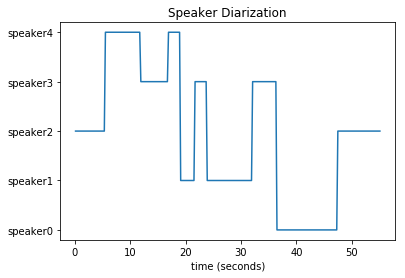

In [40]:
show_spkDia(ex)

In [4]:
# Import the required module for text  
# to speech conversion 
from gtts import gTTS 
  
# This module is imported so that we can  
# play the converted audio 
import os 
  
# The text that you want to convert to audio 
mytext = 'Hello Claire, I love you'
  
# Language in which you want to convert 
language = 'en'
  
# Passing the text and language to the engine,  
# here we have marked slow=False. Which tells  
# the module that the converted audio should  
# have a high speed 
myobj = gTTS(text=mytext, lang=language, slow=False) 
  
# Saving the converted audio in a mp3 file named 
# welcome  
myobj.save("love_you.mp3") 
  
# Playing the converted file 
#os.system("mpg321 welcome.mp3") 

In [2]:
os.system("mpg321 welcome.mp3") 

32512

In [3]:
import IPython.display as ipd
ipd.Audio('welcome.mp3')

In [4]:
from IPython.display import Audio
sound_file = './welcome.mp3'

Audio(sound_file, autoplay=True)


In [2]:
from IPython.display import Audio
Audio('./love_you.mp3', autoplay=True)

In [10]:
with open("microphone-results.wav", "wb") as f:
    f.write(audio.get_wav_data())

In [ ]:
def callback(recognizer, audio):  # this is called from the background thread

    try:
        speech_as_text = recognizer.recognize_sphinx(audio, keyword_entries=keywords)
        print(speech_as_text)

        # Look for your "Ok Google" keyword in speech_as_text
        if "hello" in speech_as_text:
            recognize_main()

    except sr.UnknownValueError:
        print("Oops! Didn't catch that")